In [111]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Linestring visualisation
import shapely.geometry
import shapely.wkt

# osmnx
import pandas as pd
import osmnx as ox

In [54]:
gdf = gpd.read_file("data/SanFranciscoSpeedLimitCompliance.csv")
gdf.crs = 'epsg:4326'

### Use wkt to load LineStrings from csv

In [55]:
gdf

,CNN,the_geom,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,geometry
0,6709000,LINESTRING (-122.39031948388298 37.78813450234...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,None
1,6710000,LINESTRING (-122.39117965804613 37.78745518697...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,None
2,6719000,LINESTRING (-122.39961623244395 37.78079148306...,30,HARRISON ST,48,15,29.55,33.88,38,None
3,194101,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,None
4,194201,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,None
...,...,...,...,...,...,...,...,...,...,...
608,409000,LINESTRING (-122.41160611273487 37.77622135626...,30,8TH ST,16,1,26.2,32.31,37,None
609,410000,LINESTRING (-122.41106944267237 37.77579380416...,30,8TH ST,16,1,26.2,32.31,37,None
610,411000,LINESTRING (-122.41061072931767 37.77542835163...,30,8TH ST,16,1,26.2,32.31,37,None
611,415000,LINESTRING (-122.40851633075071 37.77375969975...,30,8TH ST,18,0,25.1,32,0,None


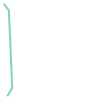

In [56]:
shapely.wkt.loads(gdf.the_geom[5])

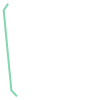

In [58]:
pol1 = shapely.wkt.loads(gdf.the_geom[4])
pol1

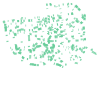

In [59]:
line = shapely.geometry.MultiLineString([shapely.wkt.loads(x) for x in gdf.the_geom])
line

### Add lines to the `geometry` column and print the result 

In [60]:
gdf['geometry'] = gdf.the_geom.apply(lambda x: shapely.wkt.loads(x) if x else GeometryCollection())
gdf.crs = {'init' : 'epsg:4326'}

E:\Anaconda3\envs\ox\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

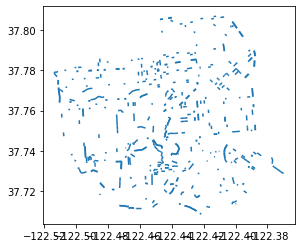

In [61]:
gdf.plot()

In [62]:
gdf.head()

,CNN,the_geom,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,geometry
0,6709000,LINESTRING (-122.39031948388298 37.78813450234...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,"LINESTRING (-122.39032 37.78813, -122.39118 37..."
1,6710000,LINESTRING (-122.39117965804613 37.78745518697...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,"LINESTRING (-122.39118 37.78746, -122.39205 37..."
2,6719000,LINESTRING (-122.39961623244395 37.78079148306...,30,HARRISON ST,48,15,29.55,33.88,38,"LINESTRING (-122.39962 37.78079, -122.40184 37..."
3,194101,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,"LINESTRING (-122.38776 37.75284, -122.38768 37..."
4,194201,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,"LINESTRING (-122.38776 37.75284, -122.38782 37..."


### With use of osmnx create visualisation of San Francisco 

E:\Anaconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


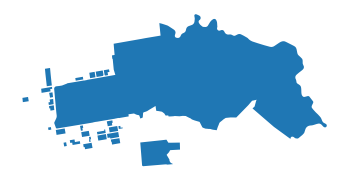

In [15]:
ox.config(log_console=True)
city = ox.geocode_to_gdf('Berkeley, California')
ax = ox.project_gdf(city).plot()
_ = ax.axis('off')

In [16]:
place_name = 'San Francisco, California'

E:\Anaconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


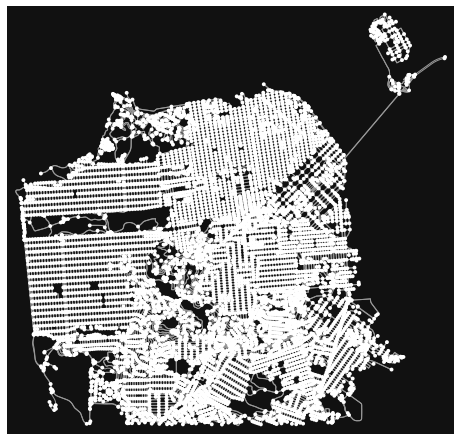

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [17]:
G = ox.graph_from_place(place_name, network_type='drive')
ox.plot_graph(G)

In [6]:
G

### San Francisco area

In [20]:
area = ox.geocode_to_gdf(place_name) # returns a GeoDataFrame based on the specified place name query
area

E:\Anaconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"MULTIPOLYGON (((-123.17382 37.77573, -123.1737...",37.929811,37.640314,-122.281479,-123.173825,337810601,relation,111968,37.779026,-122.419906,"San Francisco, California, United States",boundary,administrative,1.035131


<AxesSubplot:>

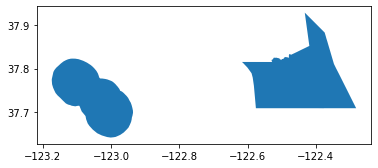

In [21]:
area.plot()
# check here: https://www.openstreetmap.org/search?query=San%20Francisco#map=11/37.7680/-122.7798

### San Francisco buildings

### San Francisco roads 

In [24]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(G)

In [25]:
nodes.head()

,y,x,street_count,ref,highway,geometry
osmid,,,,,,
32927563,37.785921,-122.390945,3,NaN,NaN,POINT (-122.39094 37.78592)
32927591,37.731353,-122.424124,3,53,motorway_junction,POINT (-122.42412 37.73135)
32927645,37.732706,-122.413261,3,54B,motorway_junction,POINT (-122.41326 37.73271)
33241803,37.805042,-122.403450,5,NaN,traffic_signals,POINT (-122.40345 37.80504)
33242031,37.799054,-122.416484,1,NaN,NaN,POINT (-122.41648 37.79905)


In [34]:
nodes.crs = 'epsg:3395' # idk whether it's compulsory or not 

<AxesSubplot:>

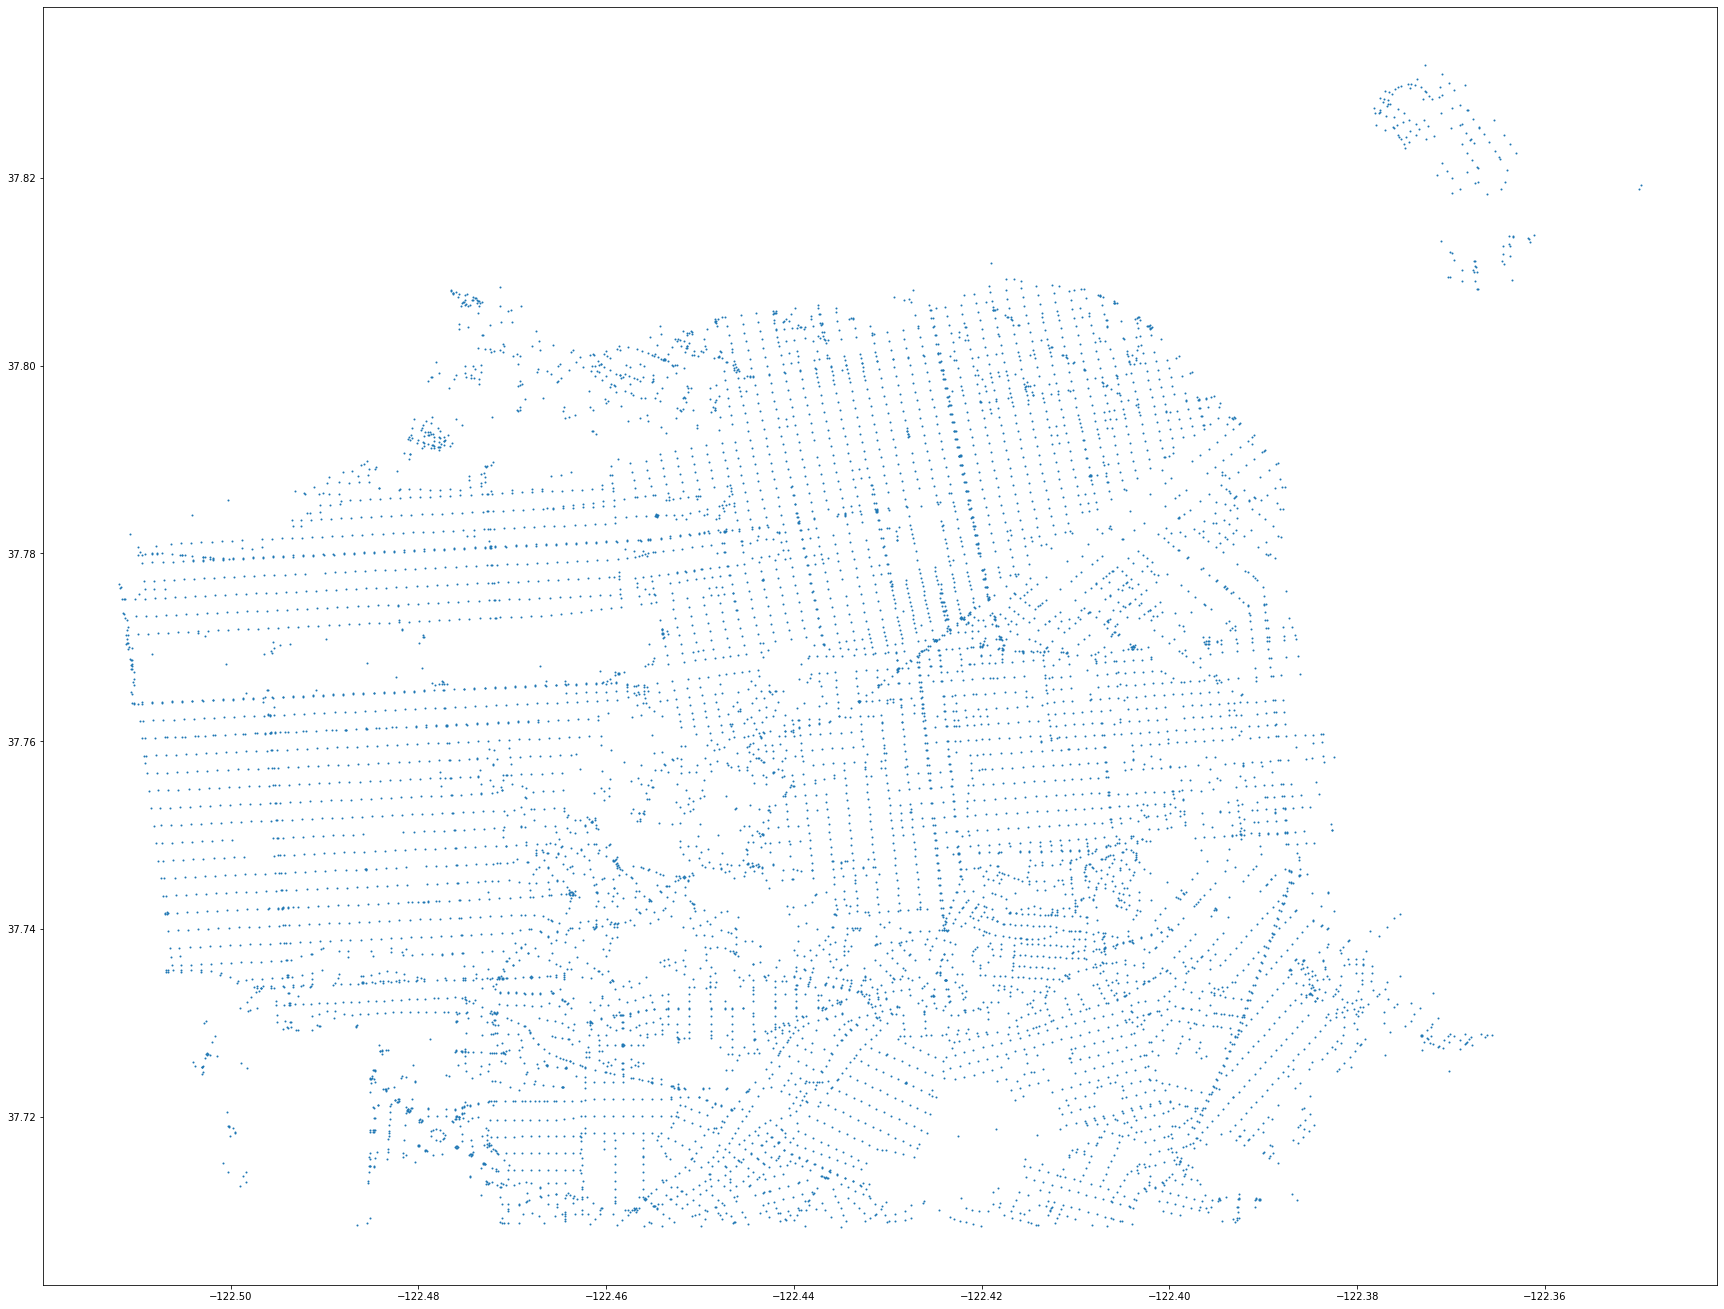

In [46]:
nodes.plot(markersize=1 ,figsize=(30, 30))

In [94]:
nodes.head()

,y,x,street_count,ref,highway,geometry
osmid,,,,,,
32927563,37.785921,-122.390945,3,NaN,NaN,POINT (-122.391 37.786)
32927591,37.731353,-122.424124,3,53,motorway_junction,POINT (-122.424 37.731)
32927645,37.732706,-122.413261,3,54B,motorway_junction,POINT (-122.413 37.733)
33241803,37.805042,-122.403450,5,NaN,traffic_signals,POINT (-122.403 37.805)
33242031,37.799054,-122.416484,1,NaN,NaN,POINT (-122.416 37.799)


In [47]:
edges.head()

osmid  \
u        v          key                                                      
32927563 645559609  0                     [50690291, 179235221, 661905446]   
32927591 315706881  0                                             28715659   
         6469349533 0                                            689603997   
32927645 65331336   0                        [28846637, 8918870, 61424023]   
         766946830  0    [8915137, 33645923, 33645968, 28656664, 61424026]   

                         oneway lanes    ref  \
u        v          key                        
32927563 645559609  0      True     5   I 80   
32927591 315706881  0      True     1    NaN   
         6469349533 0      True     4  I 280   
32927645 65331336   0      True     2  I 280   
         766946830  0      True     2    NaN   

                                                       name        highway  \
u        v          key                                                      
32927563 645559609  0    San Francisco – Oakland Bay Bridge       motorway   
32927591 315706881  0                                   NaN  motorway_link   
         6469349533 0                  John F Foran Freeway       motorway   
32927645 65331336   0          Southern Embarcadero Freeway       motorway   
         766946830  0                                   NaN  motorway_link   

                        maxspeed    length bridge  \
u        v          key                             
32927563 645559609  0     50 mph  3232.712    yes   
32927591 315706881  0        NaN   333.165    NaN   
         6469349533 0     65 mph   794.493    NaN   
32927645 65331336   0     65 mph  1196.665    yes   
         766946830  0     50 mph  1174.585    yes   

                                                                  geometry  \
u        v          key                                                      
32927563 645559609  0    LINESTRING (-122.39094 37.78592, -122.39068 37...   
32927591 315706881  0    LINESTRING (-122.42412 37.73135, -122.42362 37...   
         6469349533 0    LINESTRING (-122.42412 37.73135, -122.42396 37...   
32927645 65331336   0    LINESTRING (-122.41326 37.73271, -122.41224 37...   
         766946830  0    LINESTRING (-122.41326 37.73271, -122.41217 37...   

                        access junction service width tunnel  
u        v          key                                       
32927563 645559609  0      NaN      NaN     NaN   NaN    NaN  
32927591 315706881  0      NaN      NaN     NaN   NaN    NaN  
         6469349533 0      NaN      NaN     NaN   NaN    NaN  
32927645 65331336   0      NaN      NaN     NaN   NaN    NaN  
         766946830  0      NaN      NaN     NaN   NaN    NaN

<AxesSubplot:>

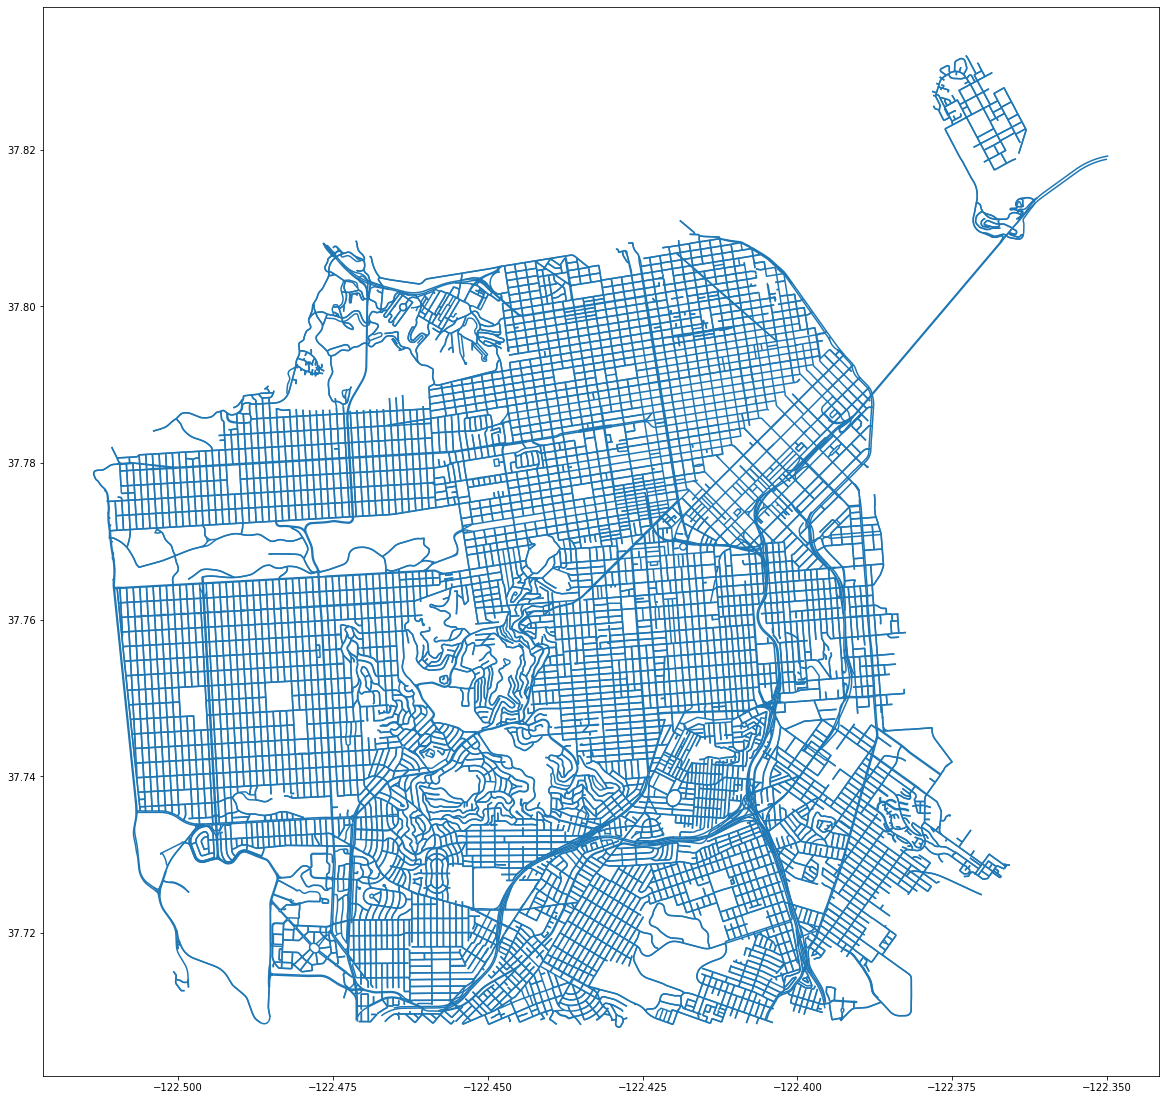

In [65]:
edges.plot(markersize=1 ,figsize=(20, 20))

In [80]:
edges.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 26881 entries, (32927563, 645559609, 0) to (9702068053, 9702068031, 0)
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   osmid     26881 non-null  object  
 1   oneway    26881 non-null  bool    
 2   lanes     8869 non-null   object  
 3   ref       423 non-null    object  
 4   name      26189 non-null  object  
 5   highway   26881 non-null  object  
 6   maxspeed  5785 non-null   object  
 7   length    26881 non-null  float64 
 8   bridge    243 non-null    object  
 9   geometry  26881 non-null  geometry
 10  access    329 non-null    object  
 11  junction  161 non-null    object  
 12  service   5 non-null      object  
 13  width     72 non-null     object  
 14  tunnel    24 non-null     object  
dtypes: bool(1), float64(1), geometry(1), object(12)
memory usage: 3.7+ MB


In [81]:
edges['upper_name'] = edges['name'].str.upper()

In [82]:
edges['upper_name']

u           v           key
32927563    645559609   0      SAN FRANCISCO – OAKLAND BAY BRIDGE
32927591    315706881   0                                     NaN
            6469349533  0                    JOHN F FORAN FREEWAY
32927645    65331336    0            SOUTHERN EMBARCADERO FREEWAY
            766946830   0                                     NaN
                                              ...                
9702068036  9702068030  0                                     NaN
            9702068018  0                                     NaN
9702068053  65339934    0                            MACALLA ROAD
            65353407    0                            MACALLA ROAD
            9702068031  0                                     NaN
Name: upper_name, Length: 26881, dtype: object

In [97]:
edges.head()

osmid  \
u        v          key                                                      
32927563 645559609  0                     [50690291, 179235221, 661905446]   
32927591 315706881  0                                             28715659   
         6469349533 0                                            689603997   
32927645 65331336   0                        [28846637, 8918870, 61424023]   
         766946830  0    [8915137, 33645923, 33645968, 28656664, 61424026]   

                         oneway lanes    ref  \
u        v          key                        
32927563 645559609  0      True     5   I 80   
32927591 315706881  0      True     1    NaN   
         6469349533 0      True     4  I 280   
32927645 65331336   0      True     2  I 280   
         766946830  0      True     2    NaN   

                                                       name        highway  \
u        v          key                                                      
32927563 645559609  0    San Francisco – Oakland Bay Bridge       motorway   
32927591 315706881  0                                   NaN  motorway_link   
         6469349533 0                  John F Foran Freeway       motorway   
32927645 65331336   0          Southern Embarcadero Freeway       motorway   
         766946830  0                                   NaN  motorway_link   

                        maxspeed    length bridge  \
u        v          key                             
32927563 645559609  0     50 mph  3232.712    yes   
32927591 315706881  0        NaN   333.165    NaN   
         6469349533 0     65 mph   794.493    NaN   
32927645 65331336   0     65 mph  1196.665    yes   
         766946830  0     50 mph  1174.585    yes   

                                                                  geometry  \
u        v          key                                                      
32927563 645559609  0    LINESTRING (-122.39094 37.78592, -122.39068 37...   
32927591 315706881  0    LINESTRING (-122.42412 37.73135, -122.42362 37...   
         6469349533 0    LINESTRING (-122.42412 37.73135, -122.42396 37...   
32927645 65331336   0    LINESTRING (-122.41326 37.73271, -122.41224 37...   
         766946830  0    LINESTRING (-122.41326 37.73271, -122.41217 37...   

                        access junction service width tunnel  \
u        v          key                                        
32927563 645559609  0      NaN      NaN     NaN   NaN    NaN   
32927591 315706881  0      NaN      NaN     NaN   NaN    NaN   
         6469349533 0      NaN      NaN     NaN   NaN    NaN   
32927645 65331336   0      NaN      NaN     NaN   NaN    NaN   
         766946830  0      NaN      NaN     NaN   NaN    NaN   

                                                 upper_name  
u        v          key                                      
32927563 645559609  0    SAN FRANCISCO – OAKLAND BAY BRIDGE  
32927591 315706881  0                                   NaN  
         6469349533 0                  JOHN F FORAN FREEWAY  
32927645 65331336   0          SOUTHERN EMBARCADERO FREEWAY  
         766946830  0                                   NaN

In [109]:
# edges[edges['upper_name'] == '3RD ST']
tmp = edges.dropna(subset=['upper_name'])
tmp[tmp['upper_name'].str.contains('HARRISON ')].head()

osmid  oneway   lanes  \
u        v          key                                                      
65281429 65317045   0    [397104884, 406944763, 283537644]   False       5   
         4627636293 0               [514170580, 513703884]   False  [3, 5]   
65281916 65317717   0                            513704346    True       5   
65282779 65281916   0                            143617584    True       5   
65285239 65317709   0       [99231468, 35675861, 35675862]   False       4   

                         ref             name    highway maxspeed   length  \
u        v          key                                                      
65281429 65317045   0    NaN  Harrison Street  secondary   25 mph  140.516   
         4627636293 0    NaN  Harrison Street  secondary   25 mph  114.977   
65281916 65317717   0    NaN  Harrison Street  secondary   25 mph   66.727   
65282779 65281916   0    NaN  Harrison Street  secondary   25 mph  276.155   
65285239 65317709   0    NaN  Harrison Street  secondary   25 mph  217.638   

                        bridge  \
u        v          key          
65281429 65317045   0      NaN   
         4627636293 0      NaN   
65281916 65317717   0      NaN   
65282779 65281916   0      NaN   
65285239 65317709   0      yes   

                                                                  geometry  \
u        v          key                                                      
65281429 65317045   0    LINESTRING (-122.39405 37.78521, -122.39441 37...   
         4627636293 0    LINESTRING (-122.39405 37.78521, -122.39388 37...   
65281916 65317717   0    LINESTRING (-122.40186 37.77904, -122.40214 37...   
65282779 65281916   0    LINESTRING (-122.39964 37.78079, -122.39977 37...   
65285239 65317709   0    LINESTRING (-122.39208 37.78677, -122.39198 37...   

                        access junction service width tunnel       upper_name  
u        v          key                                                        
65281429 65317045   0      NaN      NaN     NaN   NaN    NaN  HARRISON STREET  
         4627636293 0      NaN      NaN     NaN   NaN    NaN  HARRISON STREET  
65281916 65317717   0      NaN      NaN     NaN   NaN    NaN  HARRISON STREET  
65282779 65281916   0      NaN      NaN     NaN   NaN    NaN  HARRISON STREET  
65285239 65317709   0      NaN      NaN     NaN   NaN    NaN  HARRISON STREET

In [105]:
gdf.head()

,CNN,the_geom,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,geometry
0,6709000,LINESTRING (-122.39031948388298 37.78813450234...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,"LINESTRING (-122.39032 37.78813, -122.39118 37..."
1,6710000,LINESTRING (-122.39117965804613 37.78745518697...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,"LINESTRING (-122.39118 37.78746, -122.39205 37..."
2,6719000,LINESTRING (-122.39961623244395 37.78079148306...,30,HARRISON ST,48,15,29.55,33.88,38,"LINESTRING (-122.39962 37.78079, -122.40184 37..."
3,194101,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,"LINESTRING (-122.38776 37.75284, -122.38768 37..."
4,194201,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,"LINESTRING (-122.38776 37.75284, -122.38782 37..."


### Plot `Speed limit compliance in San Francisco` data on San Francisco map

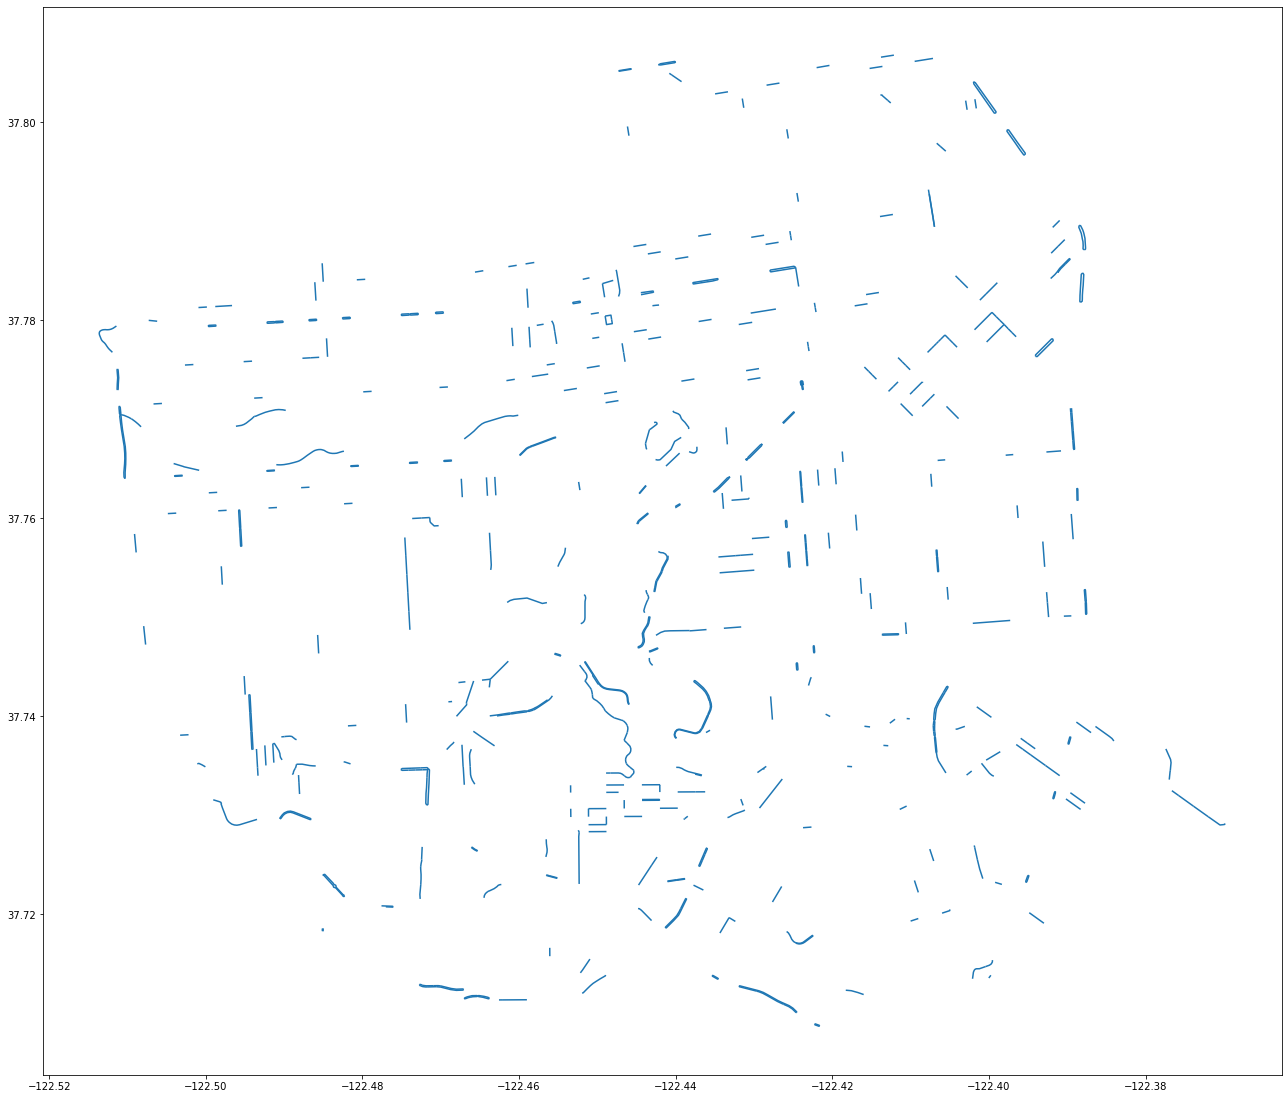

In [117]:
fig, ax = plt.subplots(figsize=(18,20))

# Plot the footprint
# edges.plot(ax=ax, facecolor='black')
gdf.plot(ax=ax)
plt.tight_layout()